## Machine Learning Notebook for Compter Vision using PyTorch
`torchvision`: - base
`torchvision.datasets` - get datasets and data loading functions for computer vision
`torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
`torchvision.transofmrs` - functions for manipulating your vision data (images) to be suited for ML models
`torch.utils.data.Dataset` - base dataset class for PyTorch

In [12]:
# Import Pytorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

## Dataset
FashionMNIST database: a database of pictures of clothes that's done in grayscale
Download is included by PyTorch (in datasets list)

In [2]:
train_data = datasets.FashionMNIST(
    root="data", # where does the downloaded data go to?
    train=True, # do we want the training dataset or testing dataset 
    download=True, #do we want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transofrm the data? ()
    target_transform=None # do we need to transform the labels (output)?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # this is the testing dataset, so no train
    download=True,
    transform=ToTensor(),
    target_transform=None
)

Using downloaded and verified file: data\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw

Using downloaded and verified file: data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [35]:
class_names = train_data.classes # command to see information of the different classes of our train_data
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_dict = train_data.class_to_idx # same command as above but returns as a dictionary (class category paired with index)
class_dict

In [13]:
# Making a DataLoader
# A DataLoader turns a dataset (in this case images) into a Python iterable (batches / mini-batches of data sections)
from torch.utils.data import DataLoader

# set up a Batch Size HYPERPARAMATER
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_features_batch, train_labels_batch = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: <built-in method size of Tensor object at 0x000001E34DE06EE0>


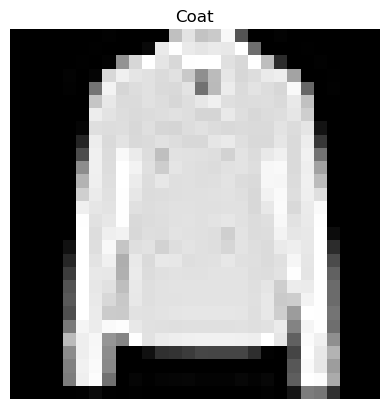

In [39]:
# SHOWING SAMPLES OF OUR MODEL'S DATA
randomIndex = torch.randint(0, len(train_features_batch), size=[1]).item() # visualize one random sample from our batch (BATCH_SIZE)
img, label = train_features_batch[randomIndex], train_labels_batch[randomIndex] # fetch the "image" and label from our batch at randomIndex
plt.imshow(img.squeeze(), cmap="gray") # displays the image (in grayscale)
plt.title(class_names[label]) # sets title to label string (since label is a tensor)
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.size}")

In [ ]:
## Building a baseline computer vision model 

